In [1]:
import sys
import os
import numpy as np
from pathlib import Path
from scipy.stats import pearsonr
root = Path(os.getcwd()).parent.parent
sys.path.append(str(Path(os.getcwd()).parent))
np.set_printoptions(threshold=sys.maxsize, suppress=True)

In [2]:
from constant import FeatureType
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import hashlib
import math

In [3]:
# set korean for matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Features

In [4]:
features = [FeatureType.SUNSHINE,
            FeatureType.GROUND_TEMPERATURE,
            FeatureType.HUMIDITY,
            FeatureType.WIND_SPEED,
            FeatureType.WIND_DIRECTION,
            FeatureType.TEMPERATURE,
            FeatureType.VISIBILITY,
            FeatureType.PRECIPITATION,
            FeatureType.STEAM_PRESSURE,
            FeatureType.DEW_POINT_TEMPERATURE,
            FeatureType.ATMOSPHERIC_PRESSURE]

## Results

In [5]:
result_path = os.path.join(root, 'results', 'LSTM-002', 'result.csv')
result_df = pd.read_csv(result_path, encoding='euc-kr')
result_df = result_df.set_index('time')
result_df

,1th model,2th model,3th model,4th model,5th model,6th model,7th model,8th model,9th model,10th model,11th model,y_test
time,,,,,,,,,,,,
2019-05-30 00:00:00,8.400133,11.202127,14.839969,12.182841,6.086262,11.877755,4.469608,5.833741,7.987203,10.305573,11.839833,0.0
2019-05-30 01:00:00,2.037278,3.103067,22.223118,23.729841,11.908956,10.753489,9.722599,1.581633,23.599443,14.689659,23.005398,0.0
2019-05-30 02:00:00,1.734496,3.171447,30.617321,21.149799,21.522736,10.960114,3.808845,-1.415684,39.424812,6.120504,38.044071,0.0
2019-05-30 03:00:00,2.037071,2.784684,40.852932,10.085787,36.175034,13.847463,6.550000,0.025927,53.258614,0.203928,54.372860,0.0
2019-05-30 04:00:00,2.938294,5.056769,54.178070,4.525202,54.040394,10.927491,6.708240,5.852853,64.617966,-0.887297,70.030319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2.231684,4.976369,89.184418,3.815124,85.110954,6.526844,4.772188,-5.777010,72.961838,1.396891,65.012665,0.0
2019-12-31 20:00:00,0.679465,12.286774,89.174522,5.665956,83.279137,5.722701,4.454058,-3.014299,72.943657,0.880453,64.328552,0.0
2019-12-31 21:00:00,1.735452,15.228869,89.040077,5.655565,81.971069,6.188827,4.872130,2.576406,72.907509,0.070968,63.840534,0.0


### NRMSE

In [6]:
nrmse_list = []

for i in range(len(features)):
    col_name = '%dth model' % (i + 1)
    y_pred = result_df[col_name]
    y_test = result_df['y_test']

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    max_min = np.max(y_test) - np.min(y_test)
    nrmse = rmse / max_min
    nrmse_list.append(nrmse)

    print(col_name)
    print('rmse:', rmse)
    print('nrmse(0 포함):', nrmse)
    print()

1th model
rmse: 34.52292665502178
nrmse(0 포함): 0.11208742420461616

2th model
rmse: 41.777030561628884
nrmse(0 포함): 0.1356397096156782

3th model
rmse: 77.0800217649597
nrmse(0 포함): 0.25025981092519384

4th model
rmse: 42.72721972503938
nrmse(0 포함): 0.138724739367011

5th model
rmse: 88.34181196094724
nrmse(0 포함): 0.2868240648082703

6th model
rmse: 43.56287611714216
nrmse(0 포함): 0.14143790947124077

7th model
rmse: 44.50425300506811
nrmse(0 포함): 0.1444943279385328

8th model
rmse: 42.41159069487795
nrmse(0 포함): 0.13769996978856477

9th model
rmse: 68.97702085899977
nrmse(0 포함): 0.2239513664253239

10th model
rmse: 46.28275866019582
nrmse(0 포함): 0.15026869694868772

11th model
rmse: 66.88474042187181
nrmse(0 포함): 0.21715824812296042



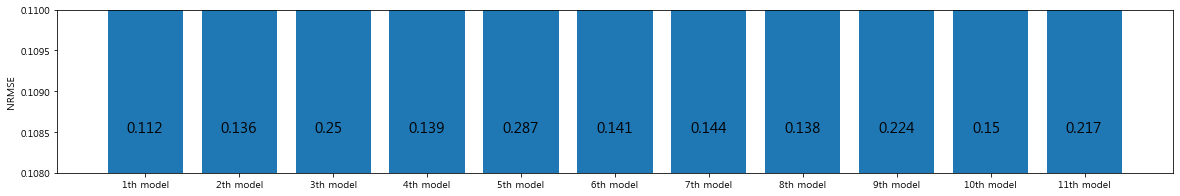

In [7]:
fig, ax= plt.subplots(1, 1, figsize=(20, 3))
plt.rcParams.update({'font.size': 15})
ax.bar(['%dth model' % (i + 1) for i in range(11)], nrmse_list)
for index, value in enumerate(nrmse_list):
    ax.text(index - 0.2, 0.1085, str(round(value, 3)))
plt.ylabel('NRMSE')
plt.ylim(0.1080, 0.11)
plt.show()

In [9]:
nrmse_list = []

for i in range(len(features)):
    col_name = '%dth model' % (i + 1)
    y_pred = result_df[col_name].tolist()
    y_test = result_df['y_test'].tolist()
    
    zero_indices = np.where(y_test == 0)
    y_data_adjusted = np.delete(y_test, zero_indices)
    y_pred_adjusted = np.delete(y_pred, zero_indices)

    rmse = np.sqrt(mean_squared_error(y_data_adjusted, y_pred_adjusted))
    max_min = np.max(y_data_adjusted) - np.min(y_data_adjusted)
    nrmse = rmse / max_min
    nrmse_list.append(nrmse)
    

    print(col_name)
    print('rmse:', rmse)
    print('nrmse(0 제거):', nrmse)
    print()

1th model
rmse: 34.52292665502178
nrmse(0 제거): 0.11208742420461616

2th model
rmse: 41.777030561628884
nrmse(0 제거): 0.1356397096156782

3th model
rmse: 77.0800217649597
nrmse(0 제거): 0.25025981092519384

4th model
rmse: 42.72721972503938
nrmse(0 제거): 0.138724739367011

5th model
rmse: 88.34181196094724
nrmse(0 제거): 0.2868240648082703

6th model
rmse: 43.56287611714216
nrmse(0 제거): 0.14143790947124077

7th model
rmse: 44.50425300506811
nrmse(0 제거): 0.1444943279385328

8th model
rmse: 42.41159069487795
nrmse(0 제거): 0.13769996978856477

9th model
rmse: 68.97702085899977
nrmse(0 제거): 0.2239513664253239

10th model
rmse: 46.28275866019582
nrmse(0 제거): 0.15026869694868772

11th model
rmse: 66.88474042187181
nrmse(0 제거): 0.21715824812296042



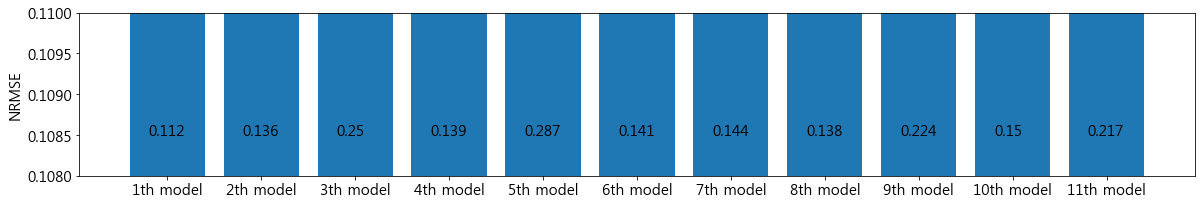

In [10]:
fig, ax= plt.subplots(1, 1, figsize=(20, 3))
plt.rcParams.update({'font.size': 15})
ax.bar(['%dth model' % (i + 1) for i in range(11)], nrmse_list)
for index, value in enumerate(nrmse_list):
    ax.text(index - 0.2, 0.1085, str(round(value, 3)))
plt.ylabel('NRMSE')
plt.ylim(0.1080, 0.11)
plt.show()

## Value

In [11]:
result_df.index = pd.to_datetime(result_df.index, format = '%Y-%m-%d %H:%M:%S').strftime('%m/%d %H:%M')
result_df

,1th model,2th model,3th model,4th model,5th model,6th model,7th model,8th model,9th model,10th model,11th model,y_test
05/30 00:00,8.400133,11.202127,14.839969,12.182841,6.086262,11.877755,4.469608,5.833741,7.987203,10.305573,11.839833,0.0
05/30 01:00,2.037278,3.103067,22.223118,23.729841,11.908956,10.753489,9.722599,1.581633,23.599443,14.689659,23.005398,0.0
05/30 02:00,1.734496,3.171447,30.617321,21.149799,21.522736,10.960114,3.808845,-1.415684,39.424812,6.120504,38.044071,0.0
05/30 03:00,2.037071,2.784684,40.852932,10.085787,36.175034,13.847463,6.550000,0.025927,53.258614,0.203928,54.372860,0.0
05/30 04:00,2.938294,5.056769,54.178070,4.525202,54.040394,10.927491,6.708240,5.852853,64.617966,-0.887297,70.030319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 19:00,2.231684,4.976369,89.184418,3.815124,85.110954,6.526844,4.772188,-5.777010,72.961838,1.396891,65.012665,0.0
12/31 20:00,0.679465,12.286774,89.174522,5.665956,83.279137,5.722701,4.454058,-3.014299,72.943657,0.880453,64.328552,0.0
12/31 21:00,1.735452,15.228869,89.040077,5.655565,81.971069,6.188827,4.872130,2.576406,72.907509,0.070968,63.840534,0.0
12/31 22:00,1.611560,10.637977,88.856583,7.666037,81.413956,7.853178,5.782685,1.766215,72.857880,-0.048634,63.479404,0.0


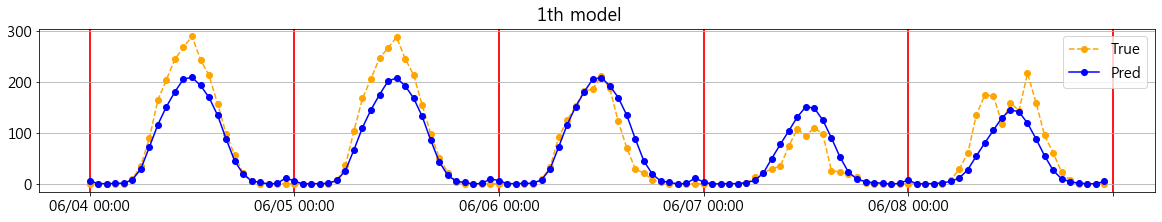

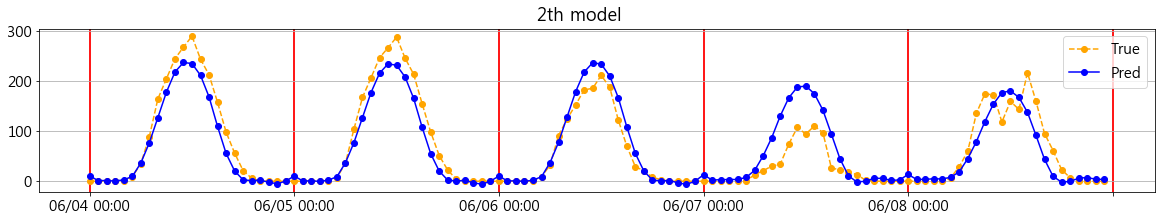

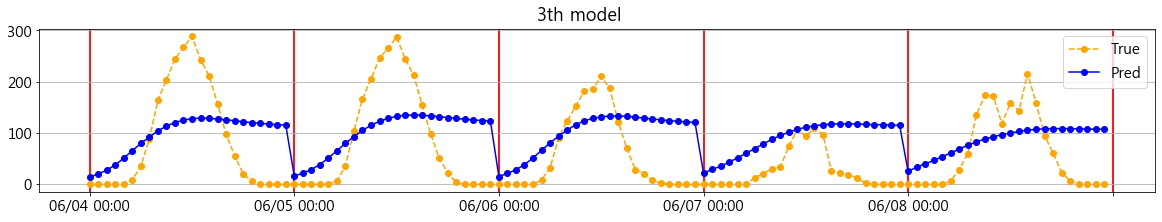

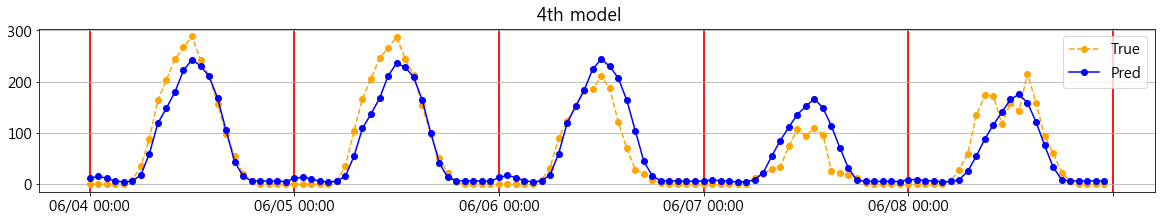

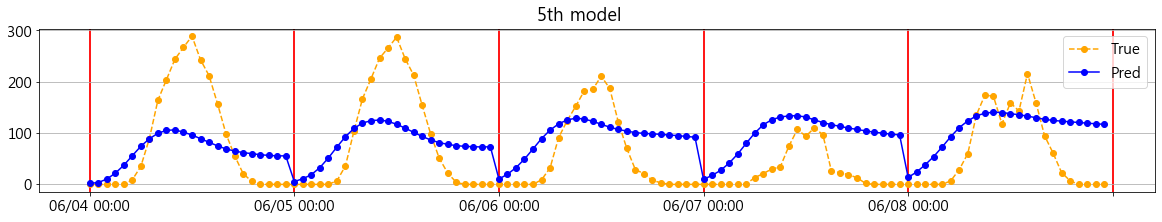

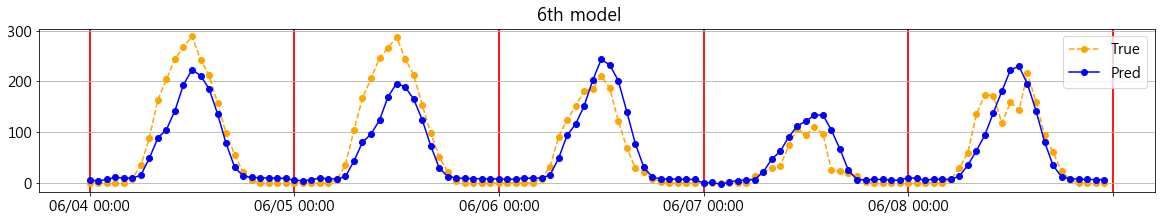

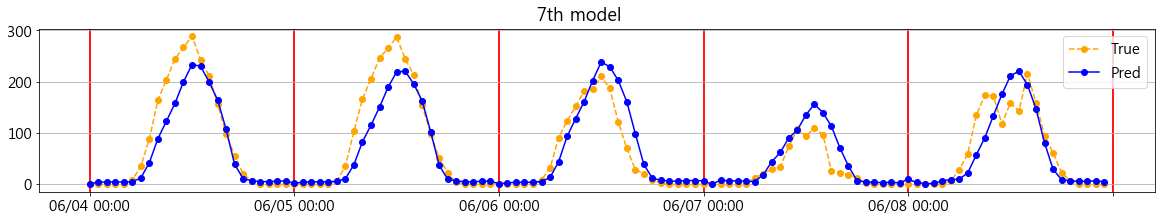

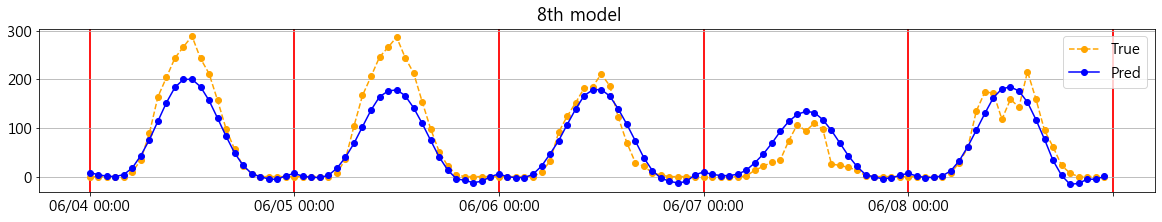

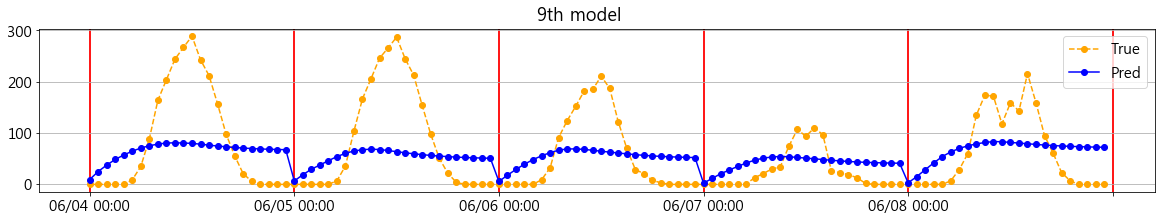

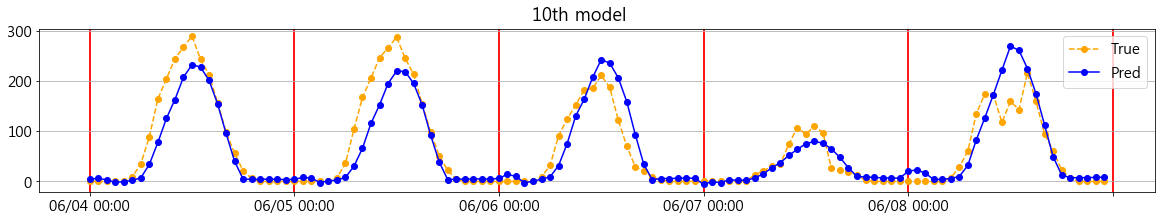

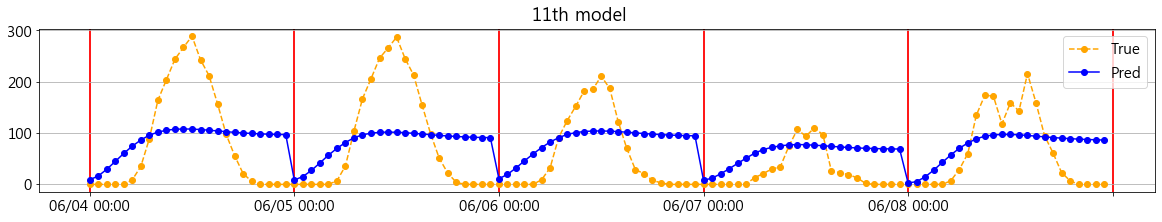

In [12]:
for i in range(len(features)):
    y_pred = result_df['%dth model' % (i + 1)][120:240]
    y_test = result_df['y_test'][120:240]

    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)

    plt.plot(y_test,marker='o',ls='--',c='orange', label = 'True')
    ax.plot(y_pred, 'bo-', label = 'Pred')
    ax.legend()

    x_ticks = np.arange(0, len(y_pred) + 1, 24)   
    ax.set_xticks(x_ticks)
    ax.grid(which='both')
    ax.grid(which='major', alpha=1.0, linewidth=1.8, color='r', axis='x')
    plt.suptitle('%dth model' % (i + 1))
    plt.show()